In [2]:
 import pandas as pd

In [3]:
data = pd.read_csv('data1.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
print(data)

                                                Reviews
0     Okay, so I'm not a big video game buff, but wa...
1     The premise of this movie has been tickling my...
2     Jim Carrey is back to much the same role that ...
3     I read several mixed reviews and several of th...
4     Warning: Does contain spoilers.<br /><br />Ope...
...                                                 ...
7495  It was great to see some of my favorite stars ...
7496  2 stars for Kay Francis -- she's wonderful! An...
7497  I really wish i could give this a negative vot...
7498  I love B movies..but come on....this wasn't ev...
7499  As I said in my comment about the first part: ...

[7500 rows x 1 columns]


In [4]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import swifter

In [5]:
def remove_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

data['processed']=data['Reviews'].swifter.apply(remove_html)
data.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

,Reviews,processed
0,"Okay, so I'm not a big video game buff, but wa...","Okay, so I'm not a big video game buff, but wa..."
1,The premise of this movie has been tickling my...,The premise of this movie has been tickling my...
2,Jim Carrey is back to much the same role that ...,Jim Carrey is back to much the same role that ...
3,I read several mixed reviews and several of th...,I read several mixed reviews and several of th...
4,Warning: Does contain spoilers.<br /><br />Ope...,Warning: Does contain spoilers.Open Your EyesI...


In [6]:
def remove_splch(text):
    text = re.sub(r'^[\'\s]*|[^\w\s\'-]', '', text)
    return text
data['processed']=data['processed'].swifter.apply(remove_splch)
data.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

,Reviews,processed
0,"Okay, so I'm not a big video game buff, but wa...",Okay so I'm not a big video game buff but was ...
1,The premise of this movie has been tickling my...,The premise of this movie has been tickling my...
2,Jim Carrey is back to much the same role that ...,Jim Carrey is back to much the same role that ...
3,I read several mixed reviews and several of th...,I read several mixed reviews and several of th...
4,Warning: Does contain spoilers.<br /><br />Ope...,Warning Does contain spoilersOpen Your EyesIf ...


In [7]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words and len(token) > 1]
    return tokens
data['processed']=data['processed'].swifter.apply(tokenize_and_remove_stopwords)
data.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

,Reviews,processed
0,"Okay, so I'm not a big video game buff, but wa...","[Okay, 'm, big, video, game, buff, game, House..."
1,The premise of this movie has been tickling my...,"[premise, movie, tickling, imagination, quite,..."
2,Jim Carrey is back to much the same role that ...,"[Jim, Carrey, back, much, role, played, Mask, ..."
3,I read several mixed reviews and several of th...,"[read, several, mixed, reviews, several, downr..."
4,Warning: Does contain spoilers.<br /><br />Ope...,"[Warning, contain, spoilersOpen, EyesIf, seen,..."


In [8]:
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens
data['processed']=data['processed'].swifter.apply(lemmatize)
data.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

,Reviews,processed
0,"Okay, so I'm not a big video game buff, but wa...","[Okay, 'm, big, video, game, buff, game, House..."
1,The premise of this movie has been tickling my...,"[premise, movie, tickling, imagination, quite,..."
2,Jim Carrey is back to much the same role that ...,"[Jim, Carrey, back, much, role, played, Mask, ..."
3,I read several mixed reviews and several of th...,"[read, several, mixed, review, several, downri..."
4,Warning: Does contain spoilers.<br /><br />Ope...,"[Warning, contain, spoilersOpen, EyesIf, seen,..."


In [9]:
def lowercasing(tokens):
    return [token.lower() for token in tokens]
data['processed']=data['processed'].swifter.apply(lowercasing)
data.processed.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

0    [okay, 'm, big, video, game, buff, game, house...
1    [premise, movie, tickling, imagination, quite,...
2    [jim, carrey, back, much, role, played, mask, ...
3    [read, several, mixed, review, several, downri...
4    [warning, contain, spoilersopen, eyesif, seen,...
Name: processed, dtype: object

In [10]:
def lowlentok(tokens, min_length=3, max_length=1000):
    return [token for token in tokens if min_length <= len(token) <= max_length]
def remove_numerical_tokens(tokens):
    return [token for token in tokens if not token.isdigit()]
def additional_token_cleaning(tokens):
    tokens = [re.sub(r'(.)\1+', r'\1\1', token) for token in tokens]
    tokens = [re.sub(r'\{.*?\}', '', token) for token in tokens]
    return tokens

In [11]:
data['processed']=data['processed'].swifter.apply(lowlentok)
data.processed.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

0    [okay, big, video, game, buff, game, house, de...
1    [premise, movie, tickling, imagination, quite,...
2    [jim, carrey, back, much, role, played, mask, ...
3    [read, several, mixed, review, several, downri...
4    [warning, contain, spoilersopen, eyesif, seen,...
Name: processed, dtype: object

In [12]:
data['processed']=data['processed'].swifter.apply(remove_numerical_tokens)
data.processed.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

0    [okay, big, video, game, buff, game, house, de...
1    [premise, movie, tickling, imagination, quite,...
2    [jim, carrey, back, much, role, played, mask, ...
3    [read, several, mixed, review, several, downri...
4    [warning, contain, spoilersopen, eyesif, seen,...
Name: processed, dtype: object

In [13]:
data['processed']=data['processed'].swifter.apply(additional_token_cleaning)
data.processed.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

0    [okay, big, video, game, buff, game, house, de...
1    [premise, movie, tickling, imagination, quite,...
2    [jim, carrey, back, much, role, played, mask, ...
3    [read, several, mixed, review, several, downri...
4    [warning, contain, spoilersopen, eyesif, seen,...
Name: processed, dtype: object

In [14]:
def removetwn(tokens):
    tokens_without_numerals = [token for token in tokens if not any(char.isdigit() for char in token)]
    return tokens_without_numerals

data['processed']=data['processed'].swifter.apply(removetwn)
data.processed.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

0    [okay, big, video, game, buff, game, house, de...
1    [premise, movie, tickling, imagination, quite,...
2    [jim, carrey, back, much, role, played, mask, ...
3    [read, several, mixed, review, several, downri...
4    [warning, contain, spoilersopen, eyesif, seen,...
Name: processed, dtype: object

In [15]:
def spl(tokens):
    preprocessed_tokens = []
    for token in tokens:
        token = re.sub(r'[^a-zA-Z]', '', token)
        if token:
            preprocessed_tokens.append(token.lower()) 
    return preprocessed_tokens

data['processed']=data['processed'].swifter.apply(spl)
data.processed.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

0    [okay, big, video, game, buff, game, house, de...
1    [premise, movie, tickling, imagination, quite,...
2    [jim, carrey, back, much, role, played, mask, ...
3    [read, several, mixed, review, several, downri...
4    [warning, contain, spoilersopen, eyesif, seen,...
Name: processed, dtype: object

In [16]:
import nltk
nltk.download('words')
from nltk.corpus import words
english_vocab = set(words.words())

def removenet(tokens):
    english_tokens = []
    for token in tokens:
        if token.lower() in english_vocab:
            english_tokens.append(token)
    return english_tokens

data['processed']=data['processed'].swifter.apply(removenet)
data['processed']=data['processed'].swifter.apply(lowlentok)
data.processed.head(5)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\akvnr\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

0    [big, video, game, buff, game, house, dead, re...
1    [premise, movie, tickling, imagination, quite,...
2    [back, much, role, mask, timid, guy, trying, g...
3    [read, several, mixed, review, several, downri...
4    [warning, contain, seen, film, plan, stop, rea...
Name: processed, dtype: object

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tokenized_sentences = data.processed.tolist()
tokenized_words = [token for sublist in tokenized_sentences for token in sublist]
documents = [' '.join(tokenized_words)]
vectorizer = TfidfVectorizer()
tfidf_vector = vectorizer.fit_transform(documents)
tfidf_vector_array = tfidf_vector.toarray()
print("Vocabulary:", vectorizer.get_feature_names_out())
print("TF-IDF Vector:\n", tfidf_vector_array)

Vocabulary: ['aback' 'abandon' 'abandoned' ... 'zoo' 'zoom' 'zorro']
TF-IDF Vector:
 [[0.00013324 0.00070426 0.00186533 ... 0.00022841 0.00053295 0.00020937]]


In [18]:
from gensim.matutils import Sparse2Corpus
from gensim import corpora, models

corpus = Sparse2Corpus(tfidf_vector)
dictionary = corpora.Dictionary.from_corpus(corpus, id2word={v: k for k, v in vectorizer.vocabulary_.items()})

In [19]:
vocabulary = vectorizer.get_feature_names_out()

In [20]:
tfidf_matrix = tfidf_vector.reshape(-1, 1)  # Reshape if necessary

In [36]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from geneticalgorithm import geneticalgorithm as ga

def preprocess_data(df):
    tokenized_texts = [" ".join(row) for row in df]
    return tokenized_texts

def train_lsa_model(tokenized_texts, n_components=10):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(tokenized_texts)
    lsa_model = TruncatedSVD(n_components=n_components)
    lsa_model.fit(X)
    
    return lsa_model, vectorizer

def evaluate_lsa_model(lsa_model, vectorizer, tokenized_texts):
    X_lsa = lsa_model.transform(vectorizer.transform(tokenized_texts))
    similarity_matrix = cosine_similarity(X_lsa)
    mean_similarity = np.mean(similarity_matrix)
    
    return -mean_similarity  

def optimize_lsa_with_genetic_algorithm(df, n_components_range=(5, 11), pop_size=50, n_generations=10):
    def eval_func(solution):
        n_components = int(solution[0])
        tokenized_texts = preprocess_data(df)
        lsa_model, vectorizer = train_lsa_model(tokenized_texts, n_components=n_components)
        fitness = evaluate_lsa_model(lsa_model, vectorizer, tokenized_texts)
        return fitness
    varbound = np.array([n_components_range]) 
    
    algorithm_param = {'max_num_iteration': n_generations, 'population_size': pop_size}
    model = ga(function=eval_func, dimension=1, variable_type='int', variable_boundaries=varbound)
    
    model.run()
    
    best_solution = model.output_dict['variable']
    best_n_components = int(best_solution[0])
    tokenized_texts = preprocess_data(df)
    final_lsa_model, final_vectorizer = train_lsa_model(tokenized_texts, n_components=best_n_components)
    
    return final_lsa_model, final_vectorizer


 The best solution found:                                                                           
 [5.]

 Objective function:
 -0.6997424331315858


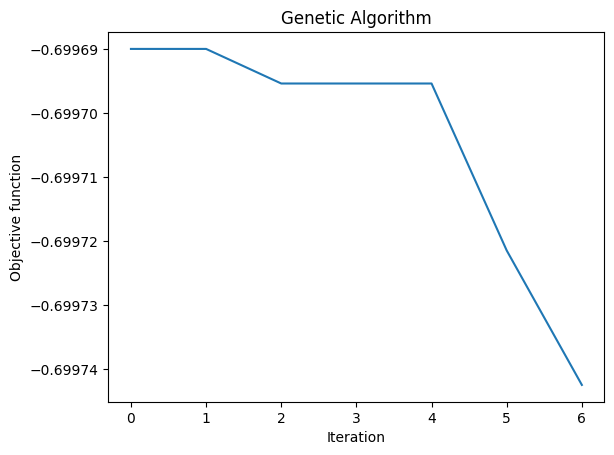

In [37]:
final_lsa_model, final_vectorizer = optimize_lsa_with_genetic_algorithm(data['processed'])

In [38]:
final_lsa_model

TruncatedSVD(n_components=5)